## Module 1 : Introduction to Visualization Tools

Reference Dark Horse Analytics (https://www.darkhorseanalytics.com/) as a model for building effective visualizations.  In general, Less Is More!

In [24]:
# Generating Histogram from Artist Layer

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas # import FigureCanvas
from matplotlib.figure import Figure # import Figure artist
fig = Figure()
canvas = FigureCanvas(fig)

# create 10000 random numbers using numpy
import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111) # create an axes artist
# note: 111 is matlob convention for one row, one column, cell one as the starting location for the subplot
ax.hist(x, 100) # generate a histogram of the 10000 numbers

# add a title to the figure and save it
ax.set_title("Normal distribution with $\mu=0, \sigma=1$")
fig.savefig("matplotlib_histogram.png")

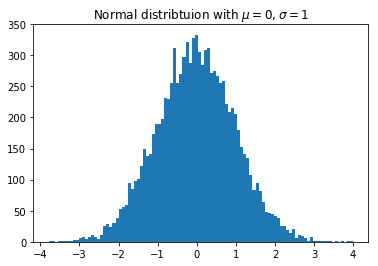

In [29]:
# Generating Histogram from Scripting Layer
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribtuion with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

In [30]:
# %matplotlib inline # forces the display of figures in the web browser 
# %matplotlib notebook # applies any subsequent changes to active figure without need to regenerate figure
import matplotlib.pyplot as plt

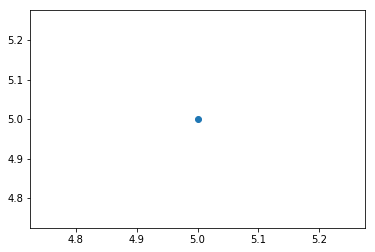

In [31]:
plt.plot(5,5,'o')
plt.show()

In [38]:
import pandas as pd
# create data frame
data = {'India':[8880,8670,8147,7338,5704],'China':[5123,6682,3308,1863,1527]}
years = [1980,1981,1982,1983,1984]
india_china_df = pd.DataFrame(data,index = years)
india_china_df

China  India
1980   5123   8880
1981   6682   8670
1982   3308   8147
1983   1863   7338
1984   1527   5704

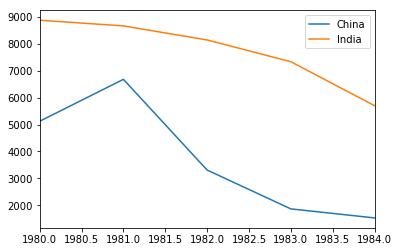

In [39]:
india_china_df.plot(kind="line")

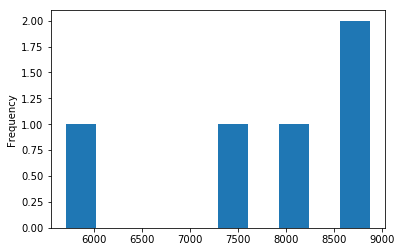

In [40]:
india_china_df["India"].plot(kind="hist")

### Dataset on Immigration to Canada

In [41]:
import numpy as np # useful for much scientific computing in Python
import pandas as pd # primary data structure library
from __future__ import print_function # adds compatibility to python 2

In [46]:
df_can = pd.read_excel("UN_Immigration_to_Canada.xlsx",
                       sheetname="Canada by Citizenship", 
                       skiprows=range(20),
                       skip_footer=2)
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...   2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...   2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...   1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...   3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...      0     0     1   
4  Southern Europe  901   Developed regions     0  ...      0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

#### Line Plot
* The best use for a line plot is when you have a continuous data set and you're interested in visualizing the data over a period of time.

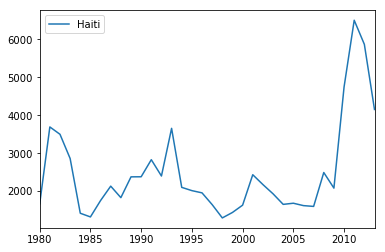

In [91]:
# My independent method of generating plots
df_can_haiti = df_can.loc[df_can['OdName']=='Haiti']
df_can_haiti = df_can_haiti.T
df_can_haiti.columns = ["Haiti"]
df_can_haiti[9:].plot()

Influx of Haitian immigration likely due to the major earthquake in 2010

In [146]:
# Following video in tutorial

# process the data frame so that the country name becomes the index of each row
df_canada = df_can.drop(["Type","Coverage","AREA","REG","DEV"],axis=1)
df_canada = df_canada.rename(index=str,columns = {"OdName":"Country","AreaName":"Continent","RegName":"Region"})
df_canada = df_canada.set_index("Country")

# add column for the cumulative sum of annual immigration from each country
df_canada['Total'] = df_canada.iloc[:,3:].sum(axis=1)

df_canada

Continent  \
Country                                                                               
Afghanistan                                                                    Asia   
Albania                                                                      Europe   
Algeria                                                                      Africa   
American Samoa                                                              Oceania   
Andorra                                                                      Europe   
Angola                                                                       Africa   
Antigua and Barbuda                                 Latin America and the Caribbean   
Argentina                                           Latin America and the Caribbean   
Armenia                                                                        Asia   
Australia                                                                   Oceania   
Austria                                                                      Europe   
Azerbaijan                                                                     Asia   
Bahamas                                             Latin America and the Caribbean   
Bahrain                                                                        Asia   
Bangladesh                                                                     Asia   
Barbados                                            Latin America and the Caribbean   
Belarus                                                                      Europe   
Belgium                                                                      Europe   
Belize                                              Latin America and the Caribbean   
Benin                                                                        Africa   
Bhutan                                                                         Asia   
Bolivia (Plurinational State of)                    Latin America and the Caribbean   
Bosnia and Herzegovina                                                       Europe   
Botswana                                                                     Africa   
Brazil                                              Latin America and the Caribbean   
Brunei Darussalam                                                              Asia   
Bulgaria                                                                     Europe   
Burkina Faso                                                                 Africa   
Burundi                                                                      Africa   
Cabo Verde                                                                   Africa   
...                                                                             ...   
Suriname                                            Latin America and the Caribbean   
Swaziland                                                                    Africa   
Sweden                                                                       Europe   
Switzerland                                                                  Europe   
Syrian Arab Republic                                                           Asia   
Tajikistan                                                                     Asia   
Thailand                                                                       Asia   
The former Yugoslav Republic of Macedonia                                    Europe   
Togo                                                                         Africa   
Tonga                                                                       Oceania   
Trinidad and Tobago                                 Latin America and the Caribbean   
Tunisia                                                                      Africa   
Turkey                                                                         Asia   
Turkmenistan                                                            

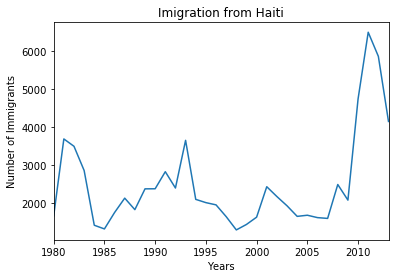

In [151]:
import matplotlib as mpl
import matplotlib.pyplot as plt

years = list(map(int,range(1980,2014)))
df_canada.loc['Haiti',years].plot(kind = 'line')
plt.title("Imigration from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")
plt.show()